Comments - You could have given a detailed analysis for the target column distribution, as we can see that our target variable personal loan is imbalanced. one class dominate over the other class. Here with the given data we can see that The last year personal loan campaign was launched for 5000 customers and out of which only 480 customers accepted. So the conversion ratio was only 9.6 percent hence the target class is imbalanced. One thing is that we need not rely on accuracy as a parameter for model evaluation we shall focus on the other metrics such as recall or AOC curve to compare and evaluate our supervised learning models.. Overall a good job done try to work on the above suggestions. Happy learning

Importing Libraries and reading data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import Imputer
from sklearn.naive_bayes import GaussianNB

Bank_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
Bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Studying attributes and data distributions of Dataframe:

Entries: 5000 rows, 14 columns

ID: User ID doesn't seem relevant contributer to target variable

Age: Integer value with max age 67, min age 23 and mean 45 year age

Experience: Integer value with max experience 43 years, min -3 which is not possible(Needs to take care) & mean 20 

Income: Integer value with min income 8000$, max  224000$ and mean 73774$

ZIP Code: Few users belong to same zip code like 169 users from "94720", 127 users from "94305" but this attribute doesn't seem relevant contributer to target variable as it has many category to be categorized

Family: Integer value with max value 4, min value 1 and median 2 family members

CCAvg: float value with min value 0, max 10000$ and mean 1937$ average spending on credit cards per month

Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional - Maximum users are Undergrad education level with frequency 2096 followed by Proffesional and Graduate

Mortgage: Integer value with maximum mortgage 635000$ and median 0$ which means almost 50 percent doesn't have any house mortgage 

Personal Loan: TARGET VARIABLE, tells customer accept the personal loan offered in the last campaign, only 480 accepted personal loan offered which is comparetively less to customer who doesn't accept offered loan

Securities Account: Tells customer have a securities account with the bank - 522 has security account and others doesnot

CD Account: Tells customer have a certificate of deposit (CD) account with the bank- 302 has CD

Online: Tells customer use internet banking facilities- 2984 use online facility

CreditCard: Tells customer use a credit card issued by UniversalBank- 1470 customer use credit cards

In [2]:
Bank_df.describe(include="all")

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [3]:
Bank_df.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
Bank_df.shape

(5000, 14)

In [5]:
Bank_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [6]:
Bank_df['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
91711     52
94025     52
92093     51
90245     50
90024     50
90089     46
91330     46
92121     45
94304     45
94143     37
95051     34
94608     34
92182     32
92028     32
92521     32
95054     31
95814     30
95014     29
94542     27
94301     27
94550     27
93407     26
        ... 
95482      2
91129      2
95307      2
95842      2
91784      2
96094      2
92116      2
94507      2
94575      2
90745      2
93033      2
94019      2
92161      2
91941      2
94116      2
95816      2
91326      2
92705      2
94604      2
90813      1
94404      1
94965      1
9307       1
91024      1
92694      1
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

In [7]:
Bank_df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [8]:
Bank_df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [9]:
Bank_df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [10]:
Bank_df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [11]:
Bank_df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

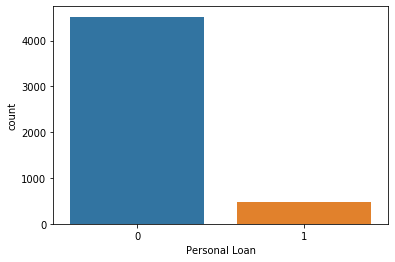

In [12]:
sns.countplot(Bank_df["Personal Loan"])

Data modification: Checking missing data, outliers, abnormal data values as well checking data correlation

1. Removed negative value from Experience attribute and replaced it by 0

2. Checking null and missing value - 0 Null/Missing Value

3. Checking for outliers in integer valued attribute - Income, CCAvg and Mortgage has numerous outliers

4. Checking correlation and scatter plot 
    4.1. Income, CCAvg and CD Account shows positive correlation with Target variable that is Personal Loan
    4.2. Experience and age are highly correlated

In [13]:
Bank_df['Experience'] = Bank_df.Experience.apply(lambda X: 0 if X < 0 else X )

In [14]:
Bank_df['Experience'].describe()

count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [15]:
Bank_df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [16]:
Bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

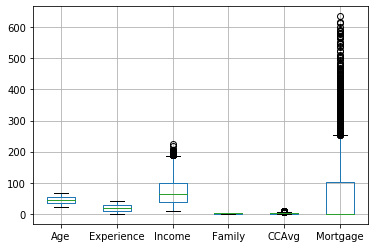

In [17]:
Bank_df.boxplot(column=['Age','Experience','Income','Family','CCAvg','Mortgage'])

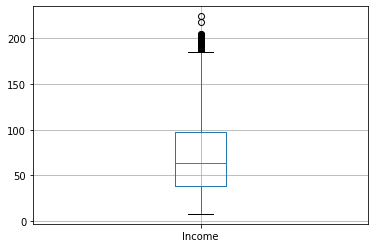

In [18]:
Bank_df.boxplot(column='Income')

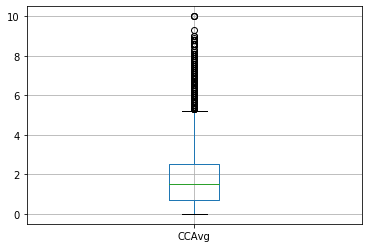

In [19]:
Bank_df.boxplot(column='CCAvg')

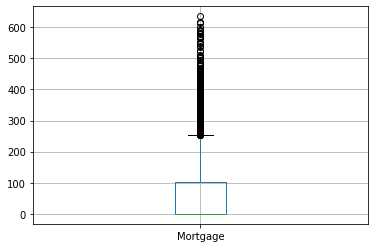

In [20]:
Bank_df.boxplot(column='Mortgage')

In [21]:
Bank_df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008265,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994198,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008265,0.994198,1.000000,-0.046729,-0.028783,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.017695,-0.055269,-0.046729,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028783,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052213,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049912,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013536,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010840,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007858,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


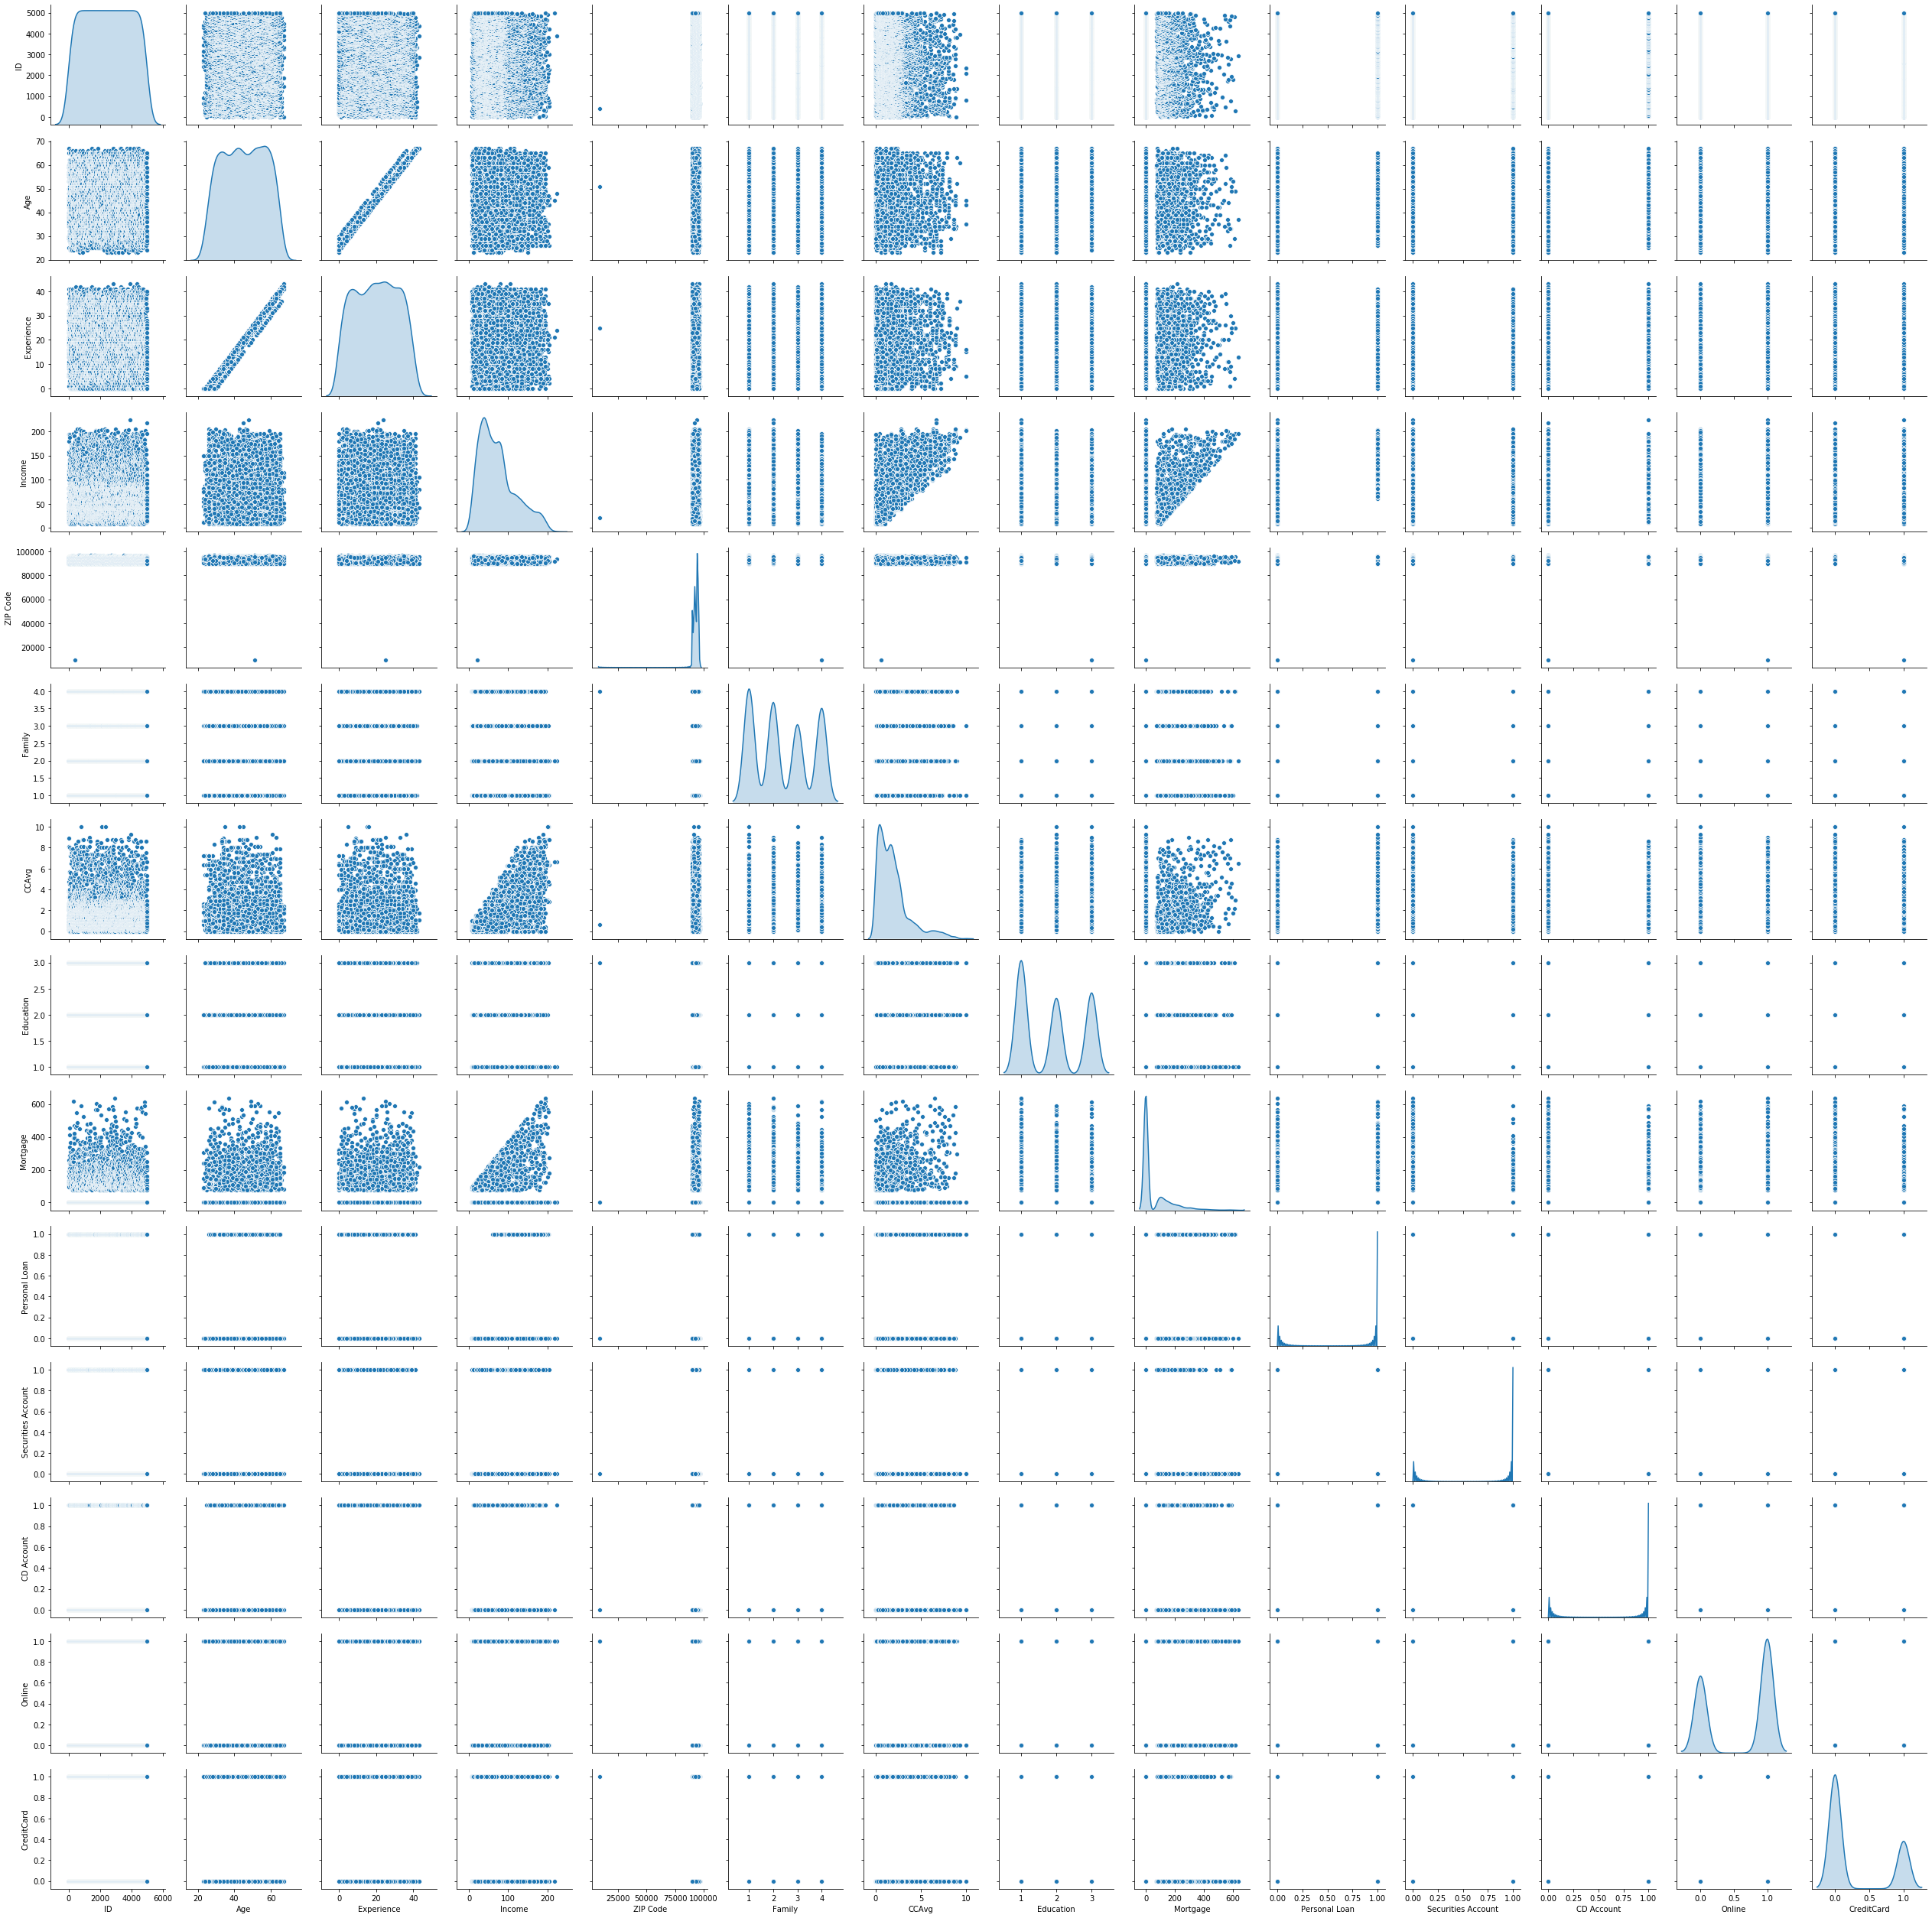

In [22]:
sns.pairplot(Bank_df,diag_kind='kde')

1.Split the data into training and test set in the ratio of 70:30 respectively
2.Removing ZIPcode and ID from Independent Variables

In [23]:
X = Bank_df.iloc[:,[1,2,3,5,6,7,8,10,11,12,13]]
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [24]:
y = Bank_df['Personal Loan']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state =1)
print(X_train.head())
print(y_train.head())

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
1334   47          22      35       2    1.3          1         0   
4768   38          14      39       1    2.0          2         0   
65     59          35     131       1    3.8          1         0   
177    29           3      65       4    1.8          2       244   
4489   39          13      21       3    0.2          2         0   

      Securities Account  CD Account  Online  CreditCard  
1334                   0           0       1           0  
4768                   0           0       1           0  
65                     0           0       1           1  
177                    0           0       0           0  
4489                   0           0       1           0  
1334    0
4768    0
65      0
177     0
4489    0
Name: Personal Loan, dtype: int64


Training and making predictions about the likelihood of a liability customer buying personal loans using various classification models
1. Logistic Regression
2. Naive Bayes
3. K-NN
4. SVM

Training & Predicting using Logistic Regression model

In [26]:
Logit_model = LogisticRegression(solver='liblinear')
Logit_model.fit(X_train,y_train)
y_predict = Logit_model.predict(X_test)
coef_df = pd.DataFrame(Logit_model.coef_)
coef_df['intercept'] = Logit_model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.399775  0.399195  0.048907  0.644517  0.162338  1.640043  0.000788   

          7         8         9        10  intercept  
0 -0.860417  3.212778 -0.571596 -0.989488  -2.489052  


In [27]:
Logit_model_score = Logit_model.score(X_test,y_test)
print(Logit_model_score)

0.946


In [28]:
metrics.accuracy_score(y_test,y_predict)

0.946

In [29]:
Logit_CM = metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print("Logit Confusion Matrix")
print(Logit_CM)

Logit Confusion Matrix
[[  84   65]
 [  16 1335]]


Training & Predicting using Naive Bayes model

In [30]:
NB_model = GaussianNB()
NB_model.fit(X_train,y_train.ravel())
#Outsample Accuracy
NB_y_predict = NB_model.predict(X_test)
metrics.accuracy_score(y_test,NB_y_predict)

0.8746666666666667

In [31]:
#Insample Accuracy
NB_y_predict_train = NB_model.predict(X_train)
metrics.accuracy_score(y_train,NB_y_predict_train)

0.89

In [32]:
print("NB Confusion Matrix")
NB_CM = metrics.confusion_matrix(y_test, NB_y_predict, labels=[1,0])
print(NB_CM)

NB Confusion Matrix
[[  84   65]
 [ 123 1228]]


Training & Predicting using K-NN model

In [33]:
# K-NN model with k = 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

# K-NN model with k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

# K-NN model with k = 9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

print("KNN Confusion Matrix with k = 9")
KNN_CM = metrics.confusion_matrix(y_test,y_pred, labels=[1,0])
print(KNN_CM)

0.904
0.9073333333333333
0.91
KNN Confusion Matrix with k = 9
[[  50   99]
 [  36 1315]]


In [34]:
# creating odd list of K for KNN
myList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

ac_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores = metrics.accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)
print(ac_scores)

The optimal number of neighbors is 9
[0.9013333333333333, 0.904, 0.9073333333333333, 0.906, 0.91, 0.906, 0.9066666666666666, 0.9066666666666666, 0.9093333333333333, 0.904]


Training & Predicting using Support Vector Machine(SVM) model

In [35]:
clf = svm.SVC()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy on training set: {:0.2f}".format(clf.score(X_train,y_train)))
print("Accuracy on test set: {:0.2f}".format(clf.score(X_test,y_test)))
print("SVM Confusion Matrix for test set")
SVM_CM = metrics.confusion_matrix(y_test,y_pred, labels=[1,0])
print(SVM_CM)

/Users/aadishagrawal/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.98
Accuracy on test set: 0.90
SVM Confusion Matrix for test set
[[   7  142]
 [   1 1350]]


Training different models using scaled dataset and comparing them in term of accuracy score

In [36]:

from sklearn.preprocessing import StandardScaler
X_std_train = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_std_train.columns = X_train.columns

X_std_test = pd.DataFrame(StandardScaler().fit_transform(X_test))
X_std_test.columns = X_test.columns

# K-NN model with k = 9 using Scaled dataset

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_std_train, y_train)
y_pred = knn.predict(X_std_test)
print("K-NN model Score")
print(metrics.accuracy_score(y_test, y_pred))
print("KNN Confusion Matrix with k = 9")
KNN_CM = metrics.confusion_matrix(y_test,y_pred, labels=[1,0])
print(KNN_CM)

#Naive Bayes model using scaled dataset

NB_model = GaussianNB()
NB_model.fit(X_std_train,y_train.ravel())
#Outsample Accuracy
NB_y_predict = NB_model.predict(X_std_test)
print("Naive Bayes model Score")
print(metrics.accuracy_score(y_test,NB_y_predict))
print("NB Confusion Matrix")
NB_CM = metrics.confusion_matrix(y_test, NB_y_predict, labels=[1,0])
print(NB_CM)

#Logistic Regression model using scaled dataset

Logit_model = LogisticRegression(solver='liblinear')
Logit_model.fit(X_std_train,y_train)
y_predict = Logit_model.predict(X_std_test)
Logit_model_score = Logit_model.score(X_std_test,y_test)
print("Logit model Score")
print(Logit_model_score)
Logit_CM = metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
print("Logit Confusion Matrix")
print(Logit_CM)

#SVM model using scaled dataset

clf = svm.SVC()
clf.fit(X_std_train,y_train)
y_pred = clf.predict(X_std_test)
print("SVM Accuracy on test set: {:0.2f}".format(clf.score(X_std_test,y_test)))
print("SVM Confusion Matrix for test set")
SVM_CM = metrics.confusion_matrix(y_test,y_pred, labels=[1,0])
print(SVM_CM)

K-NN model Score
0.952
KNN Confusion Matrix with k = 9
[[  79   70]
 [   2 1349]]
Naive Bayes model Score
0.8713333333333333
NB Confusion Matrix
[[  84   65]
 [ 128 1223]]
Logit model Score
0.9473333333333334
Logit Confusion Matrix
[[  88   61]
 [  18 1333]]
SVM Accuracy on test set: 0.97
SVM Confusion Matrix for test set
[[ 106   43]
 [   5 1346]]


Comparing different classification models, SVM is the best model in this case as it has highest model score i.e 97% followed by KNN model with 95.2%, Logit model with 94.7% and Naive Bayes model with 87.1%. Here are few more insights about models used:
1. SVM perform better as in this dataset, svm model might able to linearly separate the classes of target variables. After looking into confusion matrix for svm model we can say it has fewer Type 1 and Type 2 error comparetively to other models.
2. K-NN model has second highest model score because this model is independent of outliers and this model contain numerous outliers. Moreover different classes of target variable might be separable which make this model robust and easy to predict target variable by finding K nearest neighbor of same kind.